In [1]:
import dash
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime as dt
import warnings
warnings.filterwarning=False
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
###Dash Version:
print(dash.__version__)

2.13.0


## This notebook shows how to create various plotly graphs.

### The basic 10 step process is:
##### 1 - Selecting the basic chart type (bar-chart, pie-chart etc)
##### 2 - Adjusting the chart size
##### 3 - Adjusting the bar width
##### 4 - Adding Data Labels
##### 5 - Customizing data labels
##### 6 - Adding chart titles
##### 7 - Changing the Bar-chart color
##### 8 - changing the Chart theme.

In [3]:
avos = pd.read_csv('./data/avos.csv', parse_dates=['date'])
avos['month'] = avos['date'].dt.month_name()
custom_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
avos['month'] = pd.Categorical(avos['month'], categories=custom_order, ordered=True)
avos.sort_values(by='date')
avos.head()

date  average_price  total_volume          type  year  \
0 2015-01-04           1.22      40873.28  conventional  2015   
1 2015-01-04           1.79       1373.95       organic  2015   
2 2015-01-04           1.00     435021.49  conventional  2015   
3 2015-01-04           1.76       3846.69       organic  2015   
4 2015-01-04           1.08     788025.06  conventional  2015   

                  state        region  season  price_bin  average_revenue  \
0                Albany     Northeast  winter        1.0        442865.39   
1                Albany     Northeast  winter        2.0        649777.91   
2               Atlanta     Southeast  winter        1.0        363004.42   
3               Atlanta     Southeast  winter        2.0        638887.77   
4  Baltimore/Washington  Mid-Atlantic  winter        1.0        392044.77   

     month  
0  January  
1  January  
2  January  
3  January  
4  January

In [4]:
organic = avos.query("type == 'organic' & year == 2015 ")
organic = pd.DataFrame(organic)
organic.head()

date  average_price  total_volume     type  year  \
1 2015-01-04           1.79       1373.95  organic  2015   
3 2015-01-04           1.76       3846.69  organic  2015   
5 2015-01-04           1.29      19137.28  organic  2015   
7 2015-01-04           1.64       1505.12  organic  2015   
9 2015-01-04           1.83       2192.13  organic  2015   

                  state        region  season  price_bin  average_revenue  \
1                Albany     Northeast  winter        2.0        649777.91   
3               Atlanta     Southeast  winter        2.0        638887.77   
5  Baltimore/Washington  Mid-Atlantic  winter        1.0        468275.70   
7                 Boise          West  winter        2.0        595327.24   
9                Boston     Northeast  winter        2.0        664298.08   

     month  
1  January  
3  January  
5  January  
7  January  
9  January

In [5]:
monthly_data = organic.groupby('month')['total_volume'].median().round(2).reset_index()
monthly_data

month  total_volume
0     January       4202.66
1    February       5203.96
2       March       5373.53
3       April       6473.15
4         May       7296.30
5        June       5959.69
6        July       6169.39
7      August       5916.44
8   September       4952.62
9     October       5170.54
10   November       4698.19
11   December       4595.50

### Creating a Basic Bar Chart

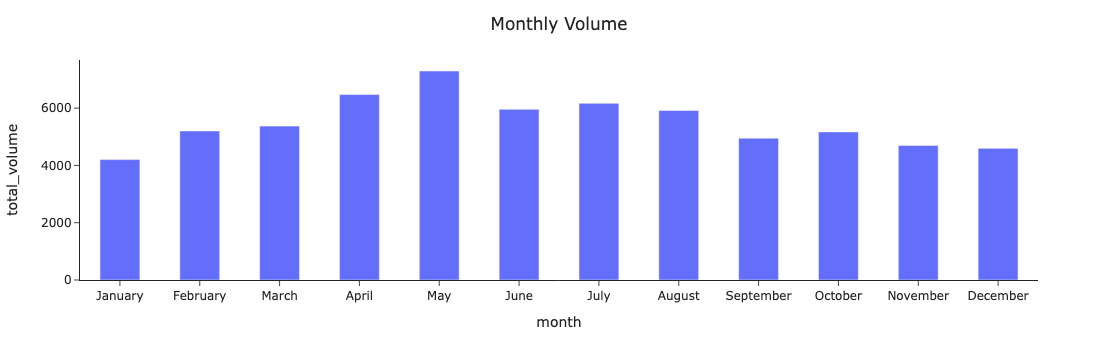

In [6]:
fig = px.bar(monthly_data,x='month', y='total_volume')
fig.update_layout(title='Monthly Volume', template='simple_white', title_x=0.5) ## center the title
fig.update_traces(width=0.5)
fig.show()

### Adjusting the Chart Size - use width and height

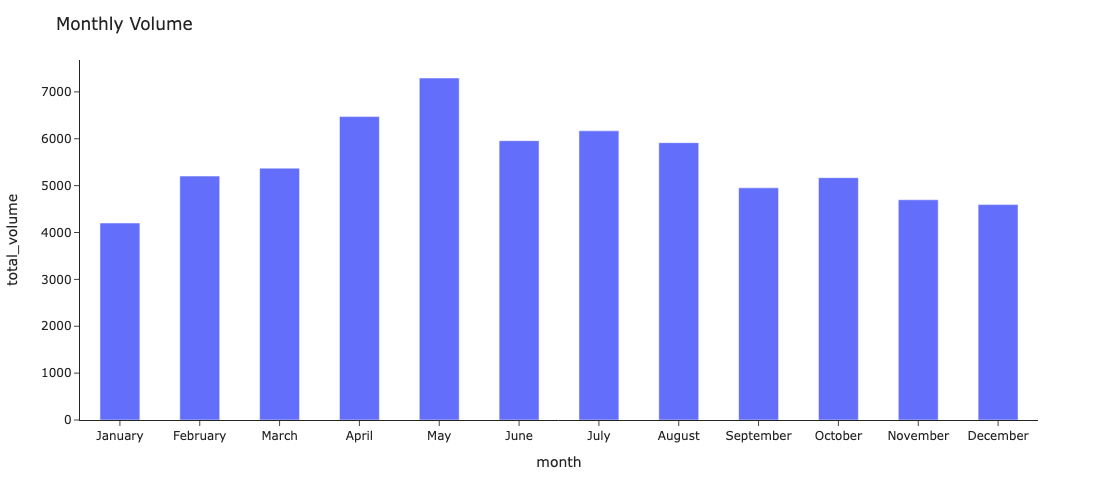

In [7]:
fig = px.bar(monthly_data,x='month', y='total_volume')
fig.update_layout(title='Monthly Volume', template='simple_white', width=1000, height=500) ##update chart width
fig.update_traces(width=0.5)## this is used to update the bar-width
fig.show()

### Adding Data Labels

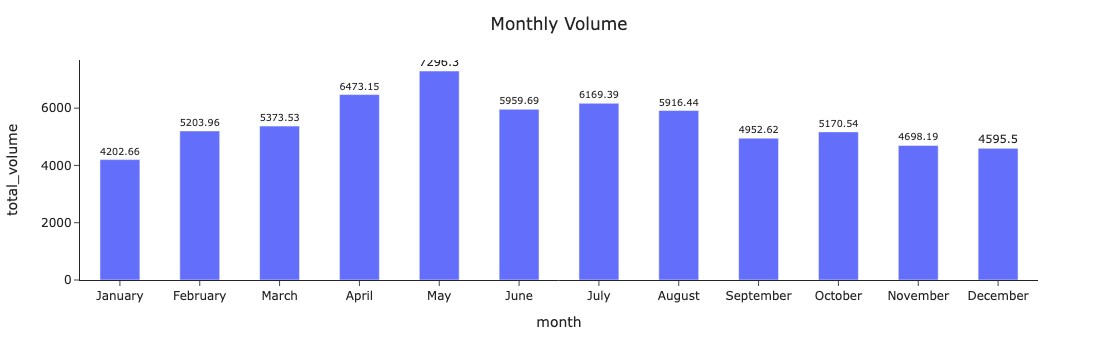

In [8]:
fig = px.bar(monthly_data,x='month', y='total_volume')
fig.update_layout(title='Monthly Volume', template='simple_white', title_x=0.5) 
fig.update_traces(width=0.5, text=monthly_data['total_volume'], textposition='outside')### this shows where to place the label values
fig.show()

### Changing the color of the bars

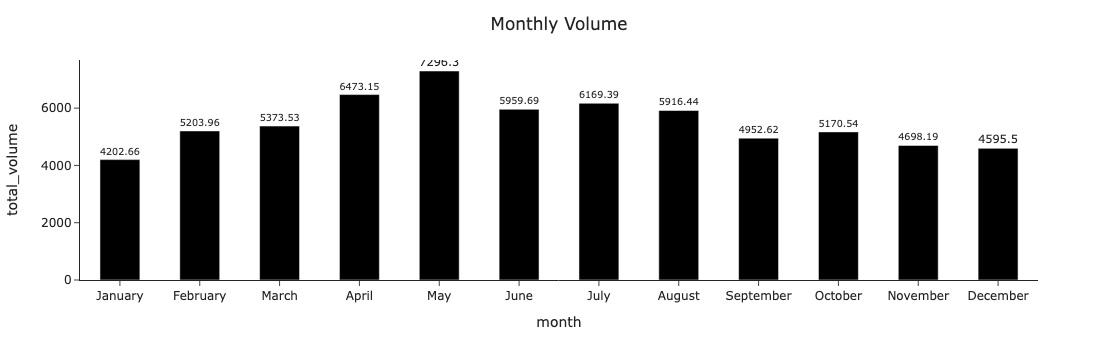

In [9]:
fig = px.bar(monthly_data,x='month', y='total_volume')
fig.update_layout(title='Monthly Volume', template='simple_white', title_x=0.5) 
fig.update_traces(width=0.5, text=monthly_data['total_volume'],textposition='outside',textfont=dict(size=14), marker_color='black')### this shows where to place the label values
fig.show()

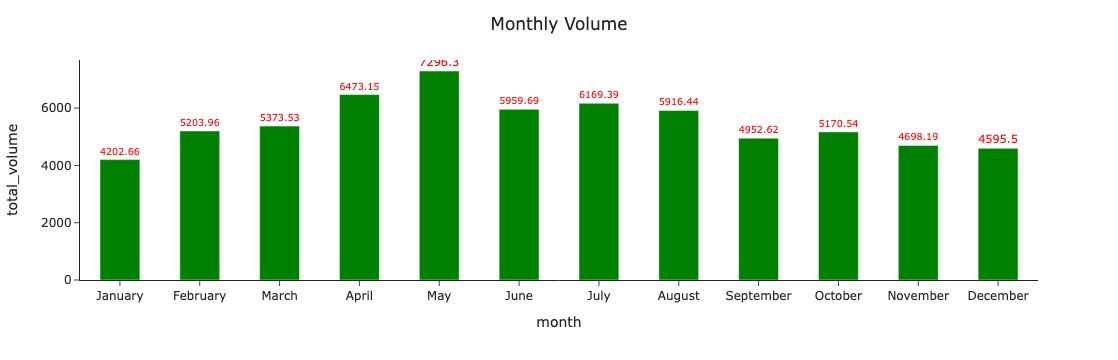

In [10]:
fig = px.bar(monthly_data,x='month', y='total_volume')
fig.update_layout(title='Monthly Volume', template='simple_white', title_x=0.5) 
fig.update_traces(width=0.5, text=monthly_data['total_volume'],textposition='outside',marker_color='green',
            textfont=dict(
                size=14,
                color='red',
    ))
fig.show()

### Creating a Basic Line Chart

In [11]:
monthly_data.head()
monthly_data.dtypes

month           category
total_volume     float64
dtype: object

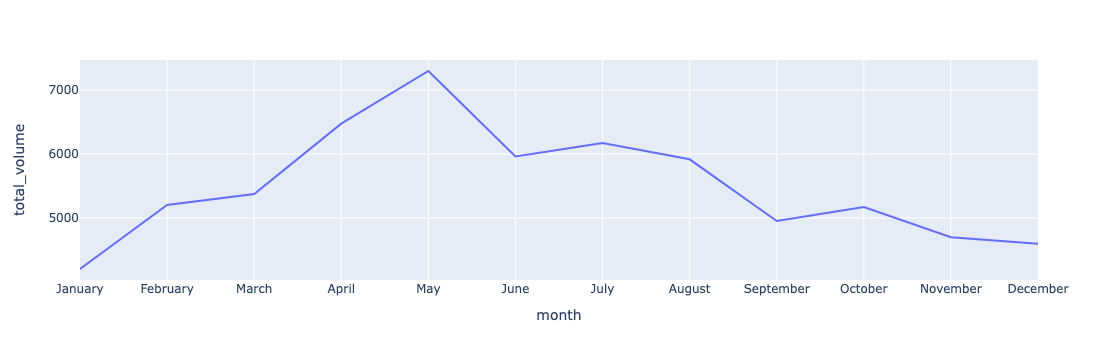

In [12]:
fig = px.line(monthly_data, x='month', y='total_volume')
fig.show()

### Adding Line Markers

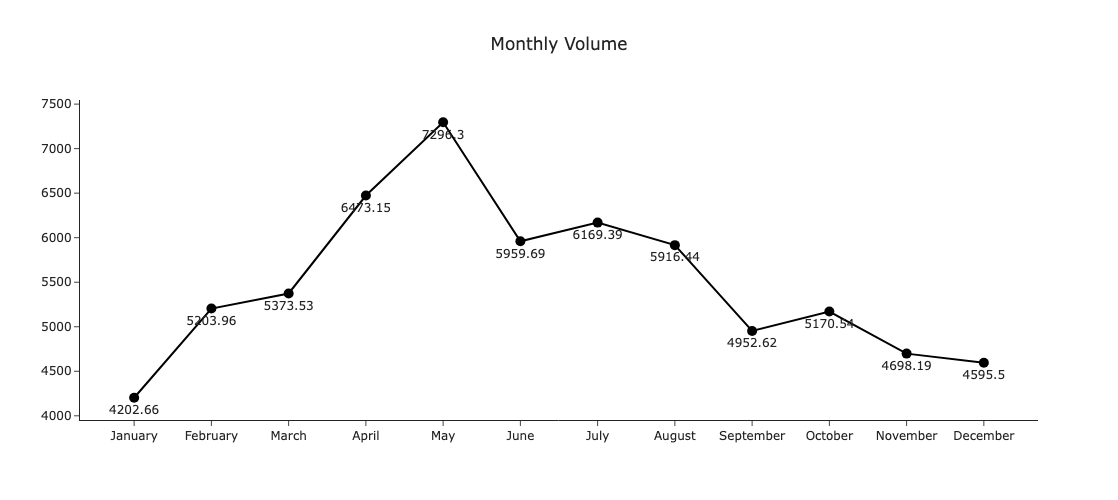

In [13]:
import plotly.graph_objects as go

# Create a line chart
fig = go.Figure(go.Scatter(
    x=monthly_data['month'],
    y=monthly_data['total_volume'],
    mode='lines+markers+text',  # To display both lines and markers
    marker=dict(size=10),  # Customize the marker size
    marker_color='black',  # Set marker color
    text=monthly_data['total_volume'],  # Add text labels for markers
    textposition='bottom center',  # Adjust text position
))

# Update the layout (title, template, etc.)
fig.update_layout( title='Monthly Volume', template='simple_white',title_x=0.5,width=1100, height=500)



# Show the plot
fig.show()


### Creating a Stacked Bar Chart

In [14]:
organic.head()

date  average_price  total_volume     type  year  \
1 2015-01-04           1.79       1373.95  organic  2015   
3 2015-01-04           1.76       3846.69  organic  2015   
5 2015-01-04           1.29      19137.28  organic  2015   
7 2015-01-04           1.64       1505.12  organic  2015   
9 2015-01-04           1.83       2192.13  organic  2015   

                  state        region  season  price_bin  average_revenue  \
1                Albany     Northeast  winter        2.0        649777.91   
3               Atlanta     Southeast  winter        2.0        638887.77   
5  Baltimore/Washington  Mid-Atlantic  winter        1.0        468275.70   
7                 Boise          West  winter        2.0        595327.24   
9                Boston     Northeast  winter        2.0        664298.08   

     month  
1  January  
3  January  
5  January  
7  January  
9  January

In [15]:
regional_data = organic.groupby(['month', 'region'])['total_volume'].median().round(2).reset_index()
regional_data = regional_data.sort_values(by=['month', 'region', 'total_volume'], ascending=[True, True, True])
regional_data = regional_data.reset_index(drop=True)
regional_data

month         region  total_volume
0    January   Mid-Atlantic       4036.24
1    January        Midwest       5887.30
2    January      Northeast       2125.20
3    January  South Central      10613.68
4    January      Southeast       2497.23
..       ...            ...           ...
67  December        Midwest       5454.02
68  December      Northeast       4592.45
69  December  South Central      10729.18
70  December      Southeast       2830.89
71  December           West      11727.34

[72 rows x 3 columns]

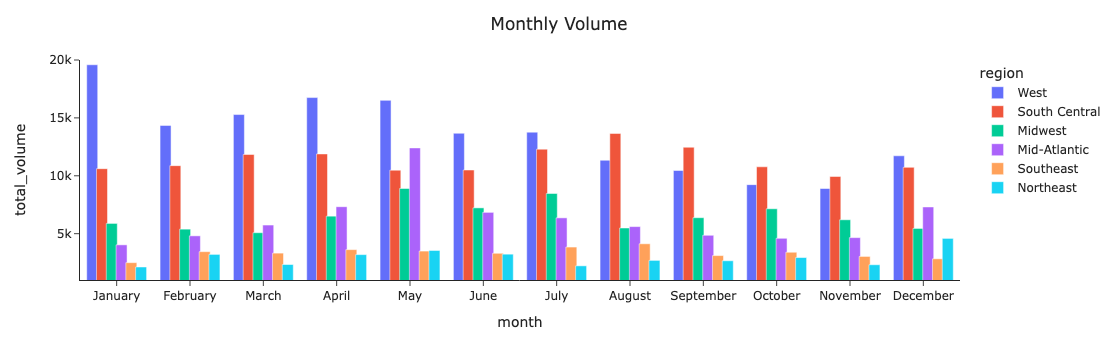

In [16]:
# sorted_month_names = sorted(regional_data['month_name'].unique())
sorted_data = regional_data.sort_values(['month','total_volume'], ascending=[True, False])
fig = px.bar(sorted_data, x='month', y='total_volume', color='region', barmode='group') ### barmode=group
fig.update_layout(title='Monthly Volume', template='simple_white', title_x=0.5)
fig.update_traces(width=0.15)
fig.update_xaxes(categoryorder='array', categoryarray=sorted_data)
fig.update_yaxes(range=[1000,20000])
fig.show()

### Custom Colors

##### link to docs: https://plotly.com/python/discrete-color/

### Creating a Multi-Line Chart

### Best used when you have categorical data

Plotly Docs: 

In [17]:
organic.head(3)

date  average_price  total_volume     type  year  \
1 2015-01-04           1.79       1373.95  organic  2015   
3 2015-01-04           1.76       3846.69  organic  2015   
5 2015-01-04           1.29      19137.28  organic  2015   

                  state        region  season  price_bin  average_revenue  \
1                Albany     Northeast  winter        2.0        649777.91   
3               Atlanta     Southeast  winter        2.0        638887.77   
5  Baltimore/Washington  Mid-Atlantic  winter        1.0        468275.70   

     month  
1  January  
3  January  
5  January

In [18]:
multi_line = organic.groupby(['month','region'])['total_volume'].median().round(2).reset_index()
multi_line.head(3)


month        region  total_volume
0  January  Mid-Atlantic       4036.24
1  January       Midwest       5887.30
2  January     Northeast       2125.20

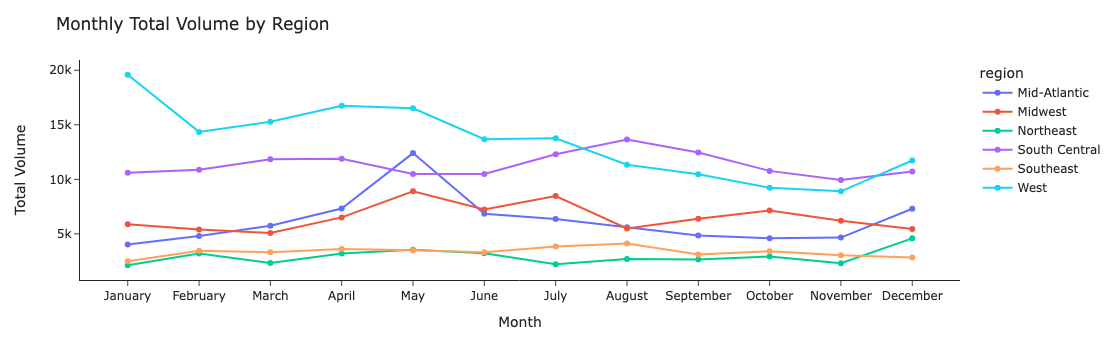

In [19]:
fig = px.line(multi_line, x='month', y='total_volume', color='region', markers=True)

fig.update_layout(
    title='Monthly Total Volume by Region',
    xaxis_title='Month',
    yaxis_title='Total Volume',
    template='simple_white',
)

fig.show()

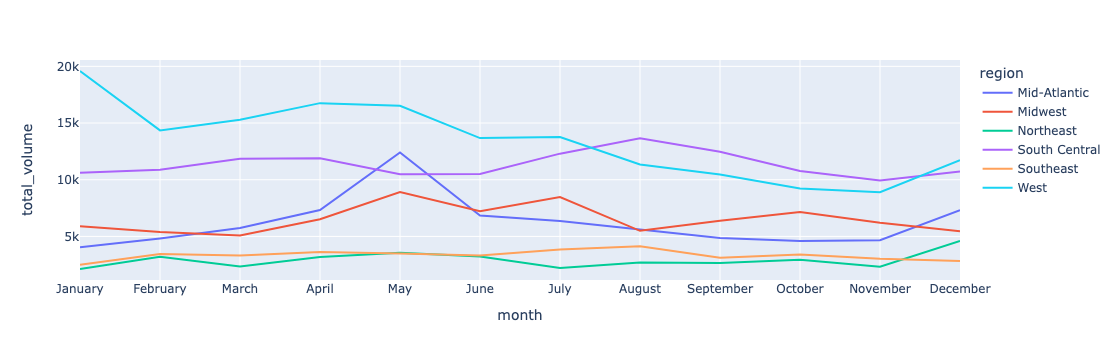

In [20]:
fig = px.line(multi_line, x='month', y='total_volume', color='region')
fig.show()

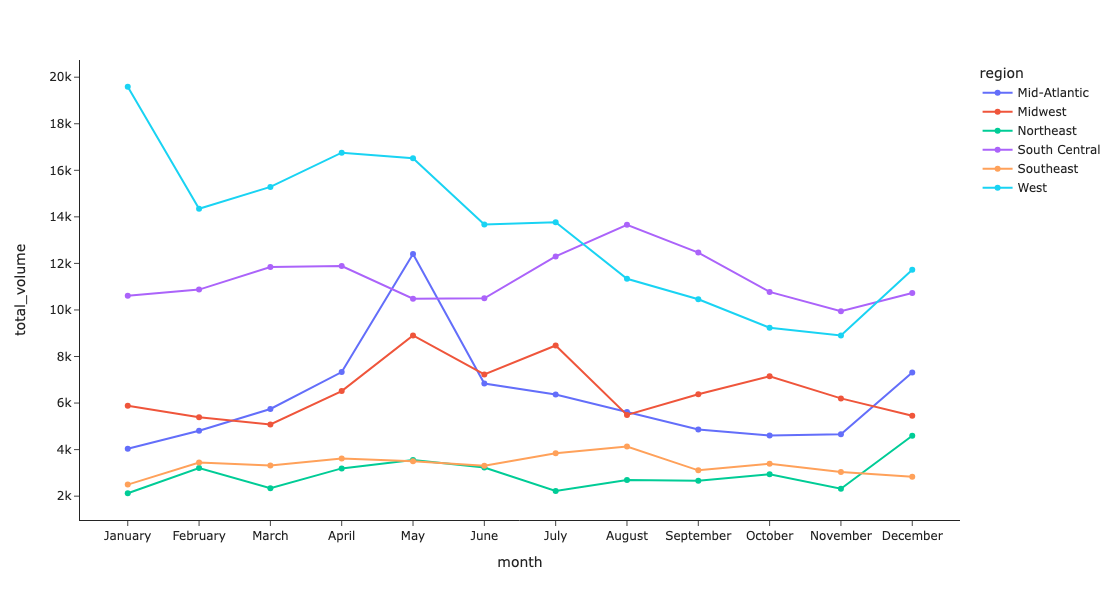

In [21]:
fig = px.line(multi_line, x='month', y='total_volume', color='region', width=1000, height=600, markers=True)
fig.update_layout(template='simple_white')
fig.show()

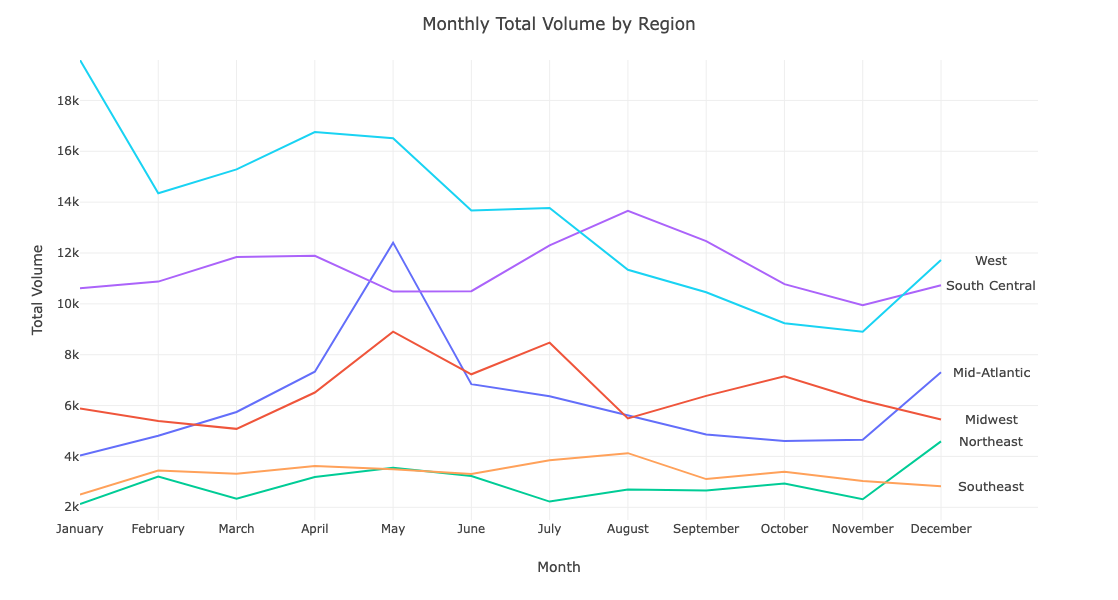

In [22]:
import plotly.express as px
import plotly.graph_objects as go


min_y_value = 1500
# Create your multi-line graph using px.line
fig = px.line(multi_line, x='month', y='total_volume', color='region', width=800,height=600,)

# Add annotations to each line
for region in multi_line['region'].unique():
    region_data = multi_line[multi_line['region'] == region]
    last_point = region_data.iloc[-1]  # Get the last data point for each region
    fig.add_annotation(
        go.layout.Annotation(
            x=last_point['month'],
            y=last_point['total_volume'],
            text=region,
            showarrow=False,
            xshift=50,  # Adjust the x position of the annotation
            font=dict(size=13),  # Customize the font size
        )
    )

# Hide the legend for the 'region' color scale
fig.update_layout(
    title='Monthly Total Volume by Region',
    title_x=0.5,
    xaxis_title='Month',
    yaxis_title='Total Volume',
    template='none',
    showlegend=False,  # Hide the legend
)

fig.update_yaxes(range=[min_y_value, multi_line['total_volume'].max()])

fig.show()


### Creating a basic line chart:

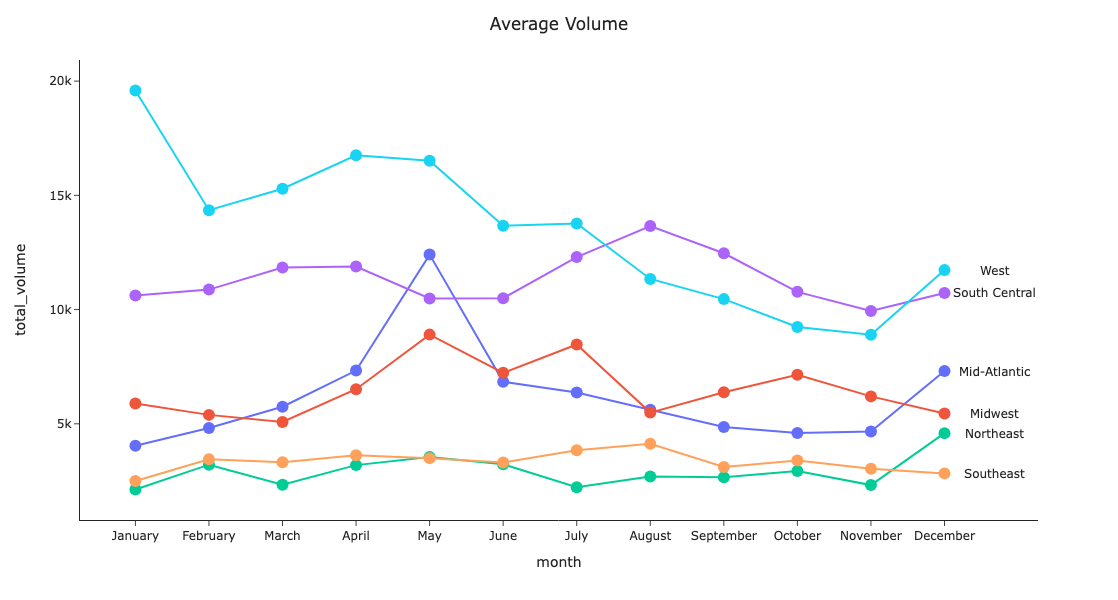

In [23]:
fig = px.line(multi_line, x='month', y='total_volume', color='region', width=900, height=600, markers=True)### basic chart
# Add annotations to each line
for region in multi_line['region'].unique():
    region_data = multi_line[multi_line['region'] == region]
    last_point = region_data.iloc[-1]  # Get the last data point for each region
    fig.add_annotation(
        go.layout.Annotation(
            x=last_point['month'],
            y=last_point['total_volume'],
            text=region,
            showarrow=False,
            xshift=50,  # Adjust the x position of the annotation
            font=dict(size=12),  # Customize the font size
        )
    )
fig.update_layout(title='Average Volume', title_x=0.5, showlegend=False, template='simple_white', )
fig.update_traces(marker_size=12)
fig.show()

#### Not Covered:
- Box Plots
- Spider Charts
- Histograms
- -TreeMaps

### Creating a scatter chart

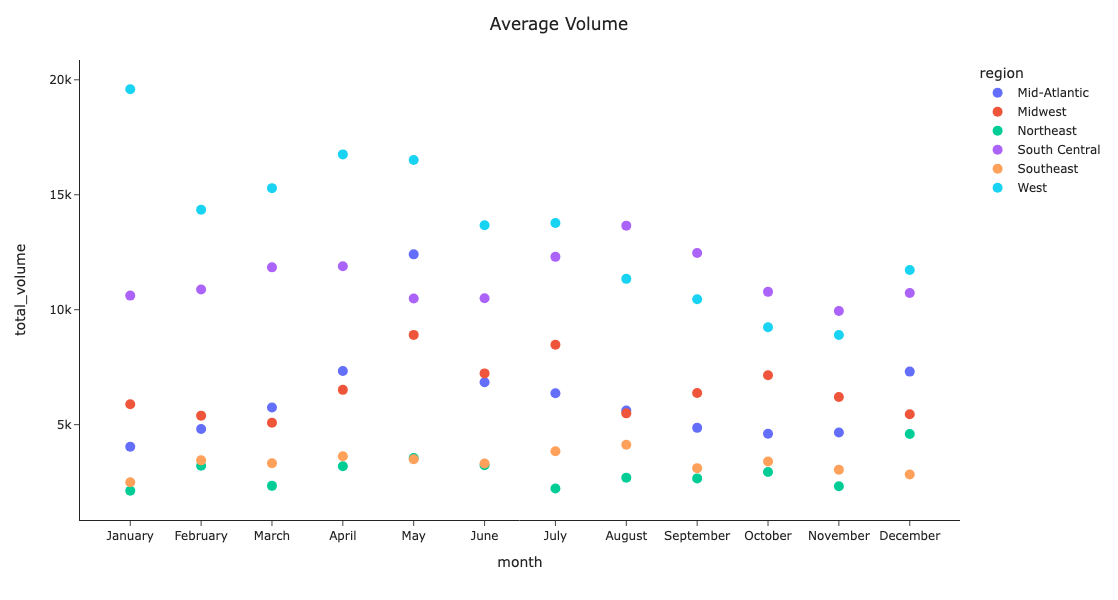

In [24]:
fig = px.scatter(multi_line, x='month', y='total_volume', color='region', width=1000, height=600)
fig.update_layout(title='Average Volume', title_x=0.5,template='simple_white')
fig.update_traces(marker_size=10)
fig.show()

In [25]:
price_scatter = organic.groupby(['month','region'])['average_price'].mean().round(2).reset_index()
single_region = price_scatter.query("region == 'West'")
single_region

month region  average_price
5     January   West           1.37
11   February   West           1.45
17      March   West           1.48
23      April   West           1.56
29        May   West           1.52
35       June   West           1.67
41       July   West           1.83
47     August   West           1.88
53  September   West           1.96
59    October   West           1.88
65   November   West           1.66
71   December   West           1.53

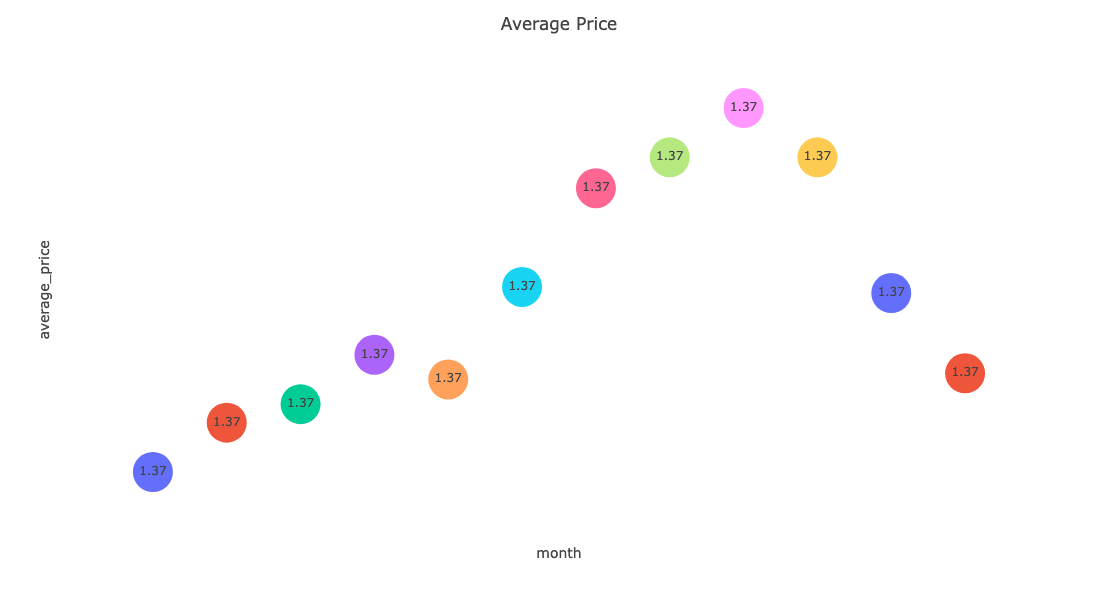

In [26]:
fig = px.scatter(single_region, x='month', y='average_price', color='month', width=1000, height=600)
fig.update_layout(title ='Average Price ', title_x=0.5, template='none', showlegend=False,
    xaxis=dict(showticklabels=False, showgrid=False),  # Hide x-axis tick labels
    yaxis=dict(showticklabels=False,showgrid=False)),
fig.update_traces(marker=dict(size=40), text=single_region['average_price'], textposition='middle center', mode = 'markers + text')
fig.show()

### Creating a Bubble 

```
fig=px.scatter(single_region, x='date', y='average_price', size='average_price')
fig.show()
```

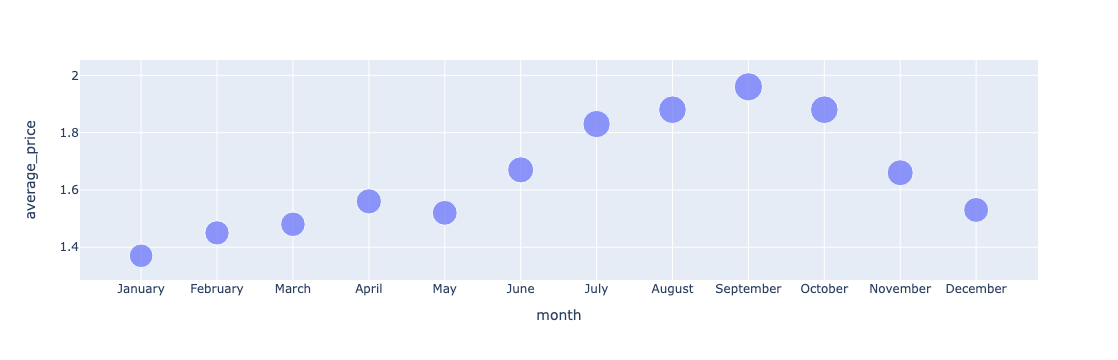

In [27]:
fig=px.scatter(single_region, x='month', y='average_price', size='average_price')
fig.show()

In [28]:
bubble_scatter = organic.groupby(['month','region'])['total_volume'].mean().round(2).reset_index()
bubble_scatter.columns
bubble= bubble_scatter.query("region =='West'")


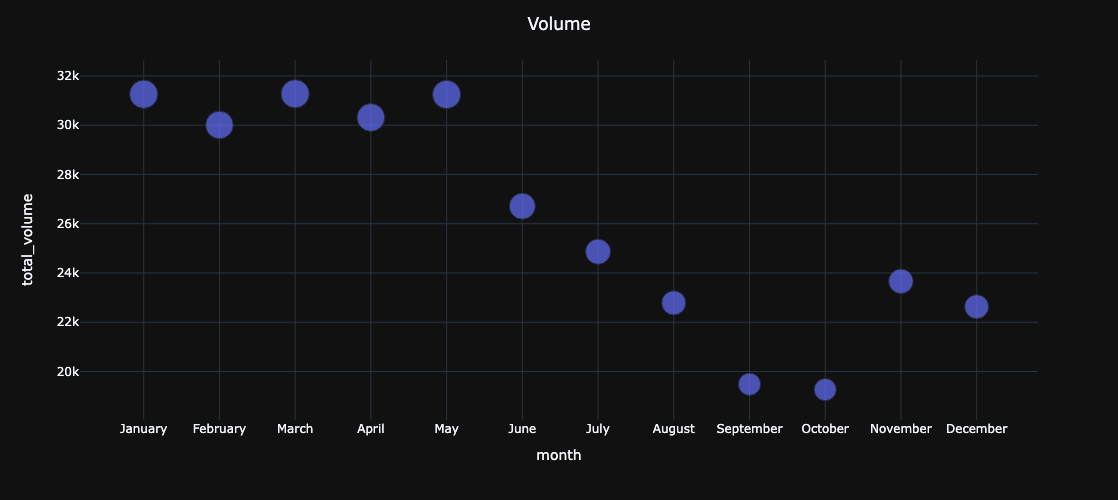

In [29]:
fig=px.scatter(bubble, x='month', y='total_volume', size='total_volume', color='region', width=800, height=500)
fig.update_layout(title='Volume', title_x=0.5, template='plotly_dark', showlegend=False)
fig.show()

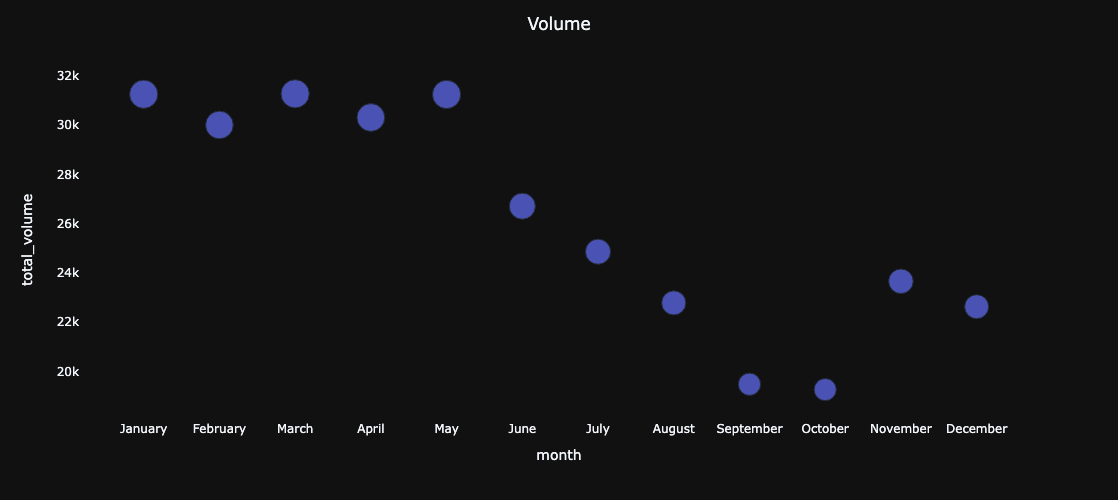

In [30]:
fig = px.scatter(bubble, x='month', y='total_volume', size='total_volume', color='region', width=800, height=500)
fig.update_layout(
    title='Volume',
    title_x=0.5,
    template='plotly_dark',
    showlegend=False,
    xaxis=dict(showgrid=False),  # Hide x-axis gridlines
    yaxis=dict(showgrid=False),  # Hide y-axis gridlines
)
fig.show()

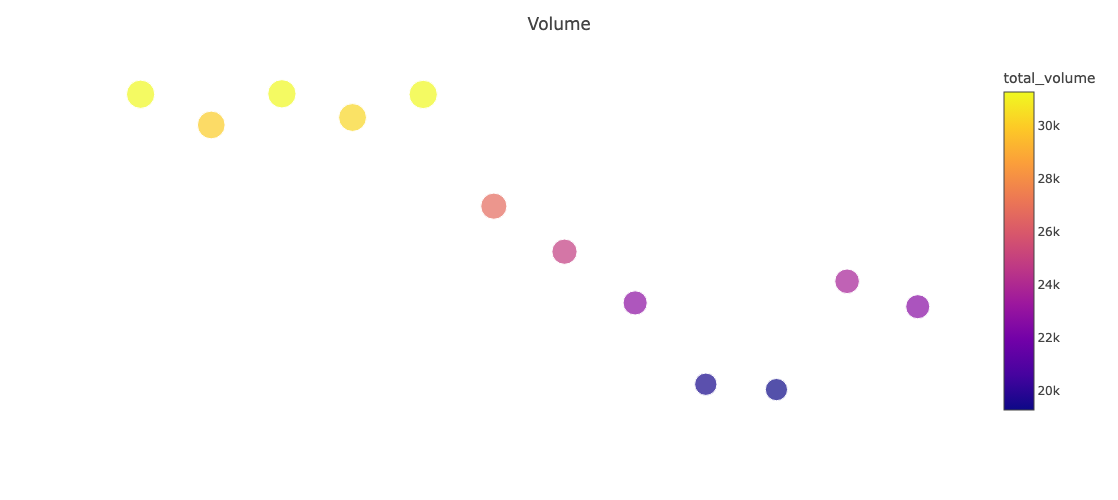

In [31]:
fig = px.scatter(bubble, x='month', y='total_volume', size='total_volume', color='total_volume', width=800, height=500)
fig.update_layout(
    title='Volume',
    title_x=0.5,
    template='none',
    showlegend=False,
    xaxis=dict(showgrid=False, showticklabels=False, zeroline=False, title=''),  # Hide x-axis gridlines, tick labels, and line
    yaxis=dict(showgrid=False, showticklabels=False, zeroline=False, title=''),  # Hide y-axis gridlines, tick labels, and line
    
)

fig.update_traces(marker=dict(colorbar=dict(title='')))
fig.show()

### Pie Charts and Donut Charts

In [32]:
avos.head(5)

date  average_price  total_volume          type  year  \
0 2015-01-04           1.22      40873.28  conventional  2015   
1 2015-01-04           1.79       1373.95       organic  2015   
2 2015-01-04           1.00     435021.49  conventional  2015   
3 2015-01-04           1.76       3846.69       organic  2015   
4 2015-01-04           1.08     788025.06  conventional  2015   

                  state        region  season  price_bin  average_revenue  \
0                Albany     Northeast  winter        1.0        442865.39   
1                Albany     Northeast  winter        2.0        649777.91   
2               Atlanta     Southeast  winter        1.0        363004.42   
3               Atlanta     Southeast  winter        2.0        638887.77   
4  Baltimore/Washington  Mid-Atlantic  winter        1.0        392044.77   

     month  
0  January  
1  January  
2  January  
3  January  
4  January

In [33]:
pie_chart = organic.groupby([organic['year'], 'region'])['total_volume'].mean().round(2).reset_index()
pie_chart

year         region  total_volume
0  2015   Mid-Atlantic       7957.18
1  2015        Midwest      11040.75
2  2015      Northeast       4774.41
3  2015  South Central      11290.03
4  2015      Southeast       3899.50
5  2015           West      26216.28

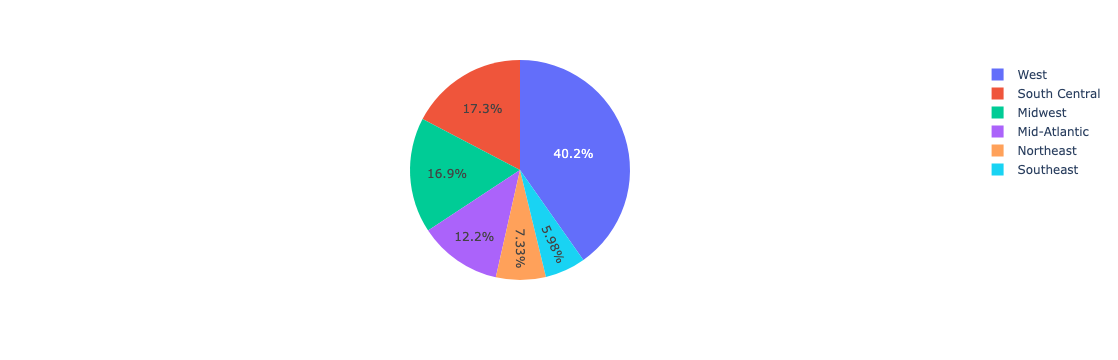

In [34]:
fig= px.pie(pie_chart, names='region', values='total_volume')
fig.show()

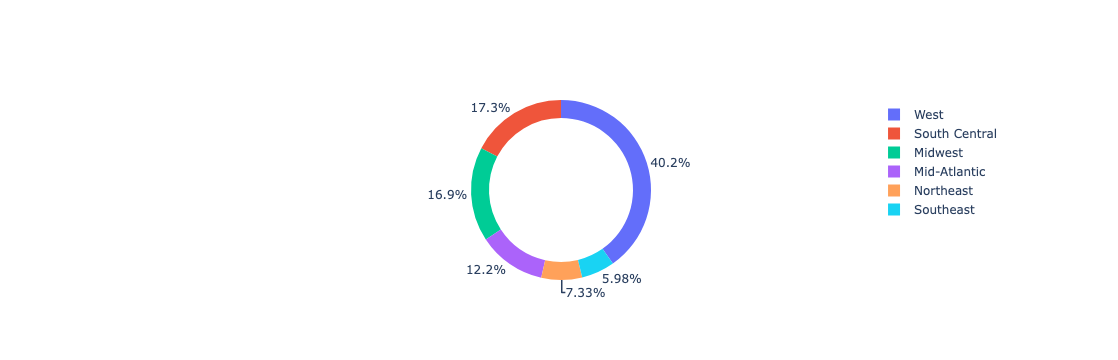

In [35]:
fig = go.Figure(go.Pie(
    labels=pie_chart['region'],
    values=pie_chart['total_volume'],
    hole=0.8
))

fig.show()

### Create Sunburst Charts
## USE

In [36]:
pie_chart

year         region  total_volume
0  2015   Mid-Atlantic       7957.18
1  2015        Midwest      11040.75
2  2015      Northeast       4774.41
3  2015  South Central      11290.03
4  2015      Southeast       3899.50
5  2015           West      26216.28

#### Creating Combo Charts

```
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=df['Year'],
        y=df['Revenue($M)'],
        name="Revenue"
    ))
fig.add_trace(
    go.Bar(
        x=df['Year'],
        y=df['Profit($M)'],
        name="Profit"
    ))

fig.show()
```

## Creating Dual-Axis Chart

### Used to show relationship between price vs volume: low_price = high_volume

In [37]:
organic.head()

date  average_price  total_volume     type  year  \
1 2015-01-04           1.79       1373.95  organic  2015   
3 2015-01-04           1.76       3846.69  organic  2015   
5 2015-01-04           1.29      19137.28  organic  2015   
7 2015-01-04           1.64       1505.12  organic  2015   
9 2015-01-04           1.83       2192.13  organic  2015   

                  state        region  season  price_bin  average_revenue  \
1                Albany     Northeast  winter        2.0        649777.91   
3               Atlanta     Southeast  winter        2.0        638887.77   
5  Baltimore/Washington  Mid-Atlantic  winter        1.0        468275.70   
7                 Boise          West  winter        2.0        595327.24   
9                Boston     Northeast  winter        2.0        664298.08   

     month  
1  January  
3  January  
5  January  
7  January  
9  January

In [45]:
dual_axis_data = organic.groupby(['month'])[['total_volume', 'average_price']].mean().round(2).reset_index()
dual_axis_data.total_volume.min()

9803.57

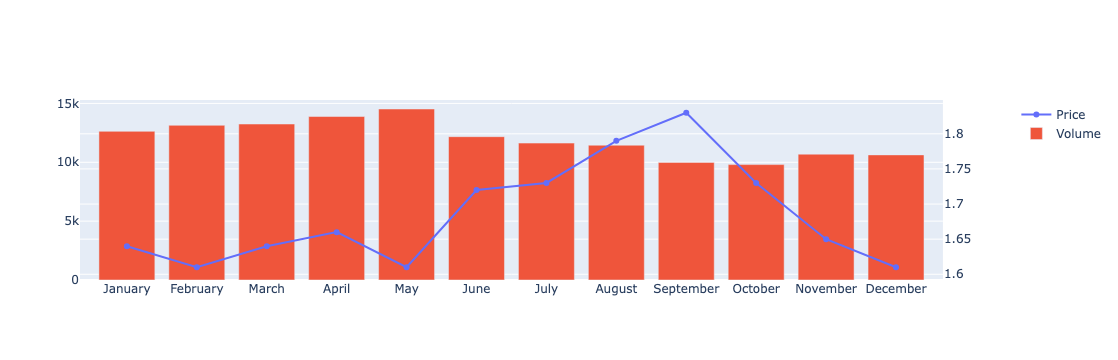

In [39]:
fig = make_subplots(specs=[[{'secondary_y':True}]])
fig.add_trace(
    go.Scatter(
        x=dual_axis_data['month'],
        y=dual_axis_data['average_price'],
        name="Price",
        mode='lines+markers'),secondary_y=True,)
fig.add_trace(
    go.Bar(
        x=dual_axis_data['month'],
        y=dual_axis_data['total_volume'],
        name="Volume"),secondary_y=False)

fig.show()


In [44]:

# fig = make_subplots(specs=[[{'secondary_y': True}]])

# fig.add_trace(
#     go.Scatter(
#         x=dual_axis_data['month'],
#         y=dual_axis_data['average_price'],
#         name="Price",
#         mode='lines+markers',
#         marker=dict(size=10),  # Adjust marker size as needed
#         line=dict(color='red'),  # Customize line color
#         text=dual_axis_data['average_price'],  # Add text labels for markers
#         textposition='top center',  # Adjust text position
#     ),
#     secondary_y=True
# )

# fig.add_trace(
#     go.Bar(
#         x=dual_axis_data['month'],
#         y=dual_axis_data['total_volume'],
#         name="Volume",
#         marker_color='blue',  # Customize bar color
#     ),
#     secondary_y=False
# )

# fig.update_layout(
#     title="Price vs Volume",
#     xaxis=dict(title="Month"),
#     template='simple_white',
#     showlegend=True,  # Show the legend
#     legend=dict(
#         x=0.85,  # Adjust the legend position
#         y=1.05,
#         bgcolor='rgba(255, 255, 255, 0)',  # Make the legend background transparent
#     ),
#     width=800,
#     height=600,
# )

# fig.show()


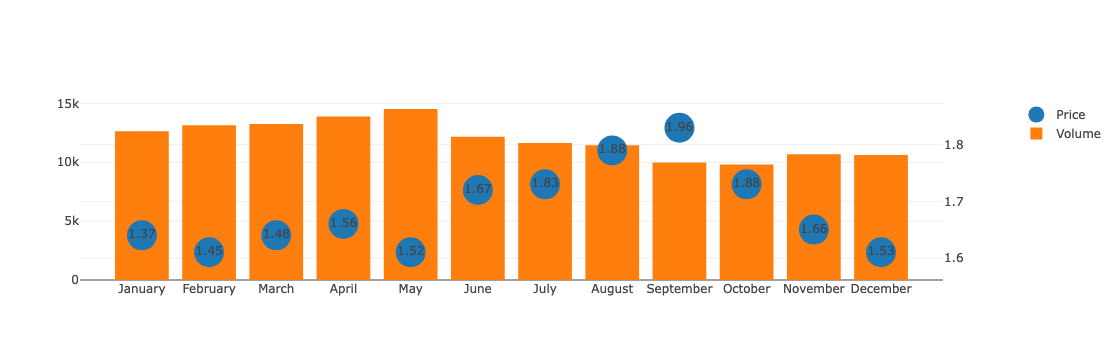

In [55]:
fig = make_subplots(specs=[[{'secondary_y':True}]])
fig.add_trace(
    go.Scatter(
        x=dual_axis_data['month'],
        y=dual_axis_data['average_price'],
        name="Price",
        mode='markers+text'),secondary_y=True,)
fig.update_traces(marker=dict(size=30), text=single_region['average_price'], textposition='middle center')
fig.add_trace(
    go.Bar(
        x=dual_axis_data['month'],
        y=dual_axis_data['total_volume'],
        name="Volume",),secondary_y=False)
fig.update_layout(template='none')
fig.show()

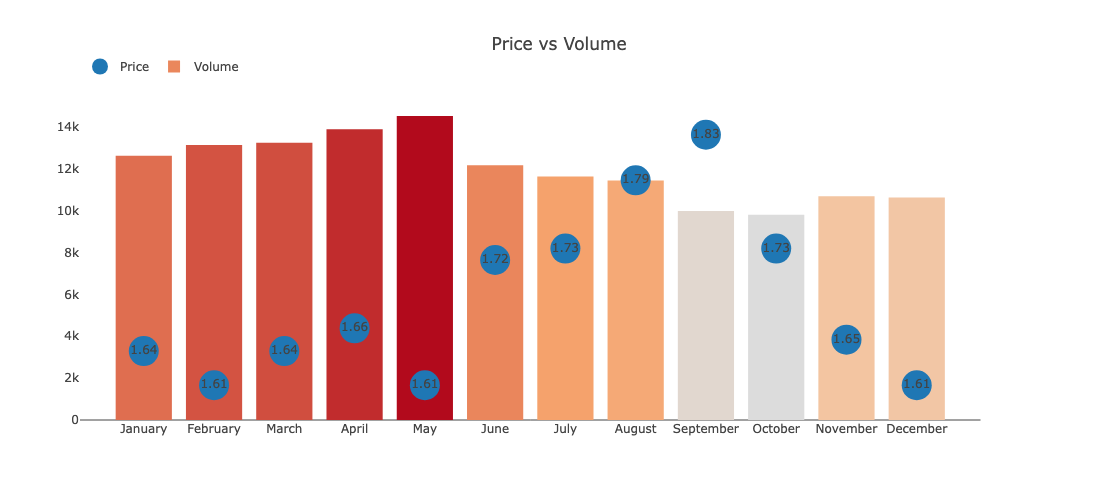

In [122]:
fig = make_subplots(specs=[[{'secondary_y': True}]])

fig.add_trace(
    go.Scatter(
        x=dual_axis_data['month'],
        y=dual_axis_data['average_price'],
        name="Price",
        mode='markers+text',
    ),
    secondary_y=True,
)

fig.update_traces(
    marker=dict(size=30),
    text=dual_axis_data['average_price'],
    textposition='middle center',
)

fig.add_trace(
    go.Bar(
        x=dual_axis_data['month'],
        y=dual_axis_data['total_volume'],
        name="Volume",
        marker_color=dual_axis_data['total_volume'],  # Set bar color to "total_volume" values
    ),
    secondary_y=False,
)

fig.update_layout(
    title="Price vs Volume",
    xaxis=dict(title=""),
    template='none',
    showlegend=True,
    legend=dict(
        x=0,  # Center the legend horizontally
        y=1.15,  # Adjust the legend position to the top
        bgcolor='rgba(255, 255, 255, 0)',
        orientation='h',  # Display the legend horizontally
    ),width=1000, height=500
)
# fig.update_yaxes(showgrid=False, showticklabels=False, secondary_y=True, secondary_y=False)
# fig.update_yaxes(showgrid=False, showticklabels=False, secondary_y=True, secondary_y=False)
fig.update_yaxes(showgrid=False, showticklabels=False, secondary_y=True)
fig.update_yaxes(showgrid=False, showticklabels=True, secondary_y=False)
fig.show()




## Creating Waterfall Charts

### Used Net Cashflow

### see example: Profit and Loss statement: https://plotly.com/python/waterfall-charts/

### Shows Profit and loss, increase and decrease in revenue Q-o-Q

In [116]:
444+573

1017

In [110]:
dual_axis_data['revenue'] = (dual_axis_data['average_price'] * dual_axis_data['total_volume']).round(2)
waterfall = dual_axis_data
waterfall['rev_growth'] = waterfall['revenue'].diff()
waterfall

month  total_volume  average_price   revenue  difference  rev_growth
0     January      12629.77           1.64  20712.82         NaN         NaN
1    February      13141.17           1.61  21157.28      444.46      444.46
2       March      13250.38           1.64  21730.62      573.34      573.34
3       April      13888.22           1.66  23054.45     1323.83     1323.83
4         May      14527.19           1.61  23388.78      334.33      334.33
5        June      12175.46           1.72  20941.79    -2446.99    -2446.99
6        July      11631.86           1.73  20123.12     -818.67     -818.67
7      August      11450.91           1.79  20497.13      374.01      374.01
8   September       9992.42           1.83  18286.13    -2211.00    -2211.00
9     October       9803.57           1.73  16960.18    -1325.95    -1325.95
10   November      10690.79           1.65  17639.80      679.62      679.62
11   December      10629.79           1.61  17113.96     -525.84     -525.84

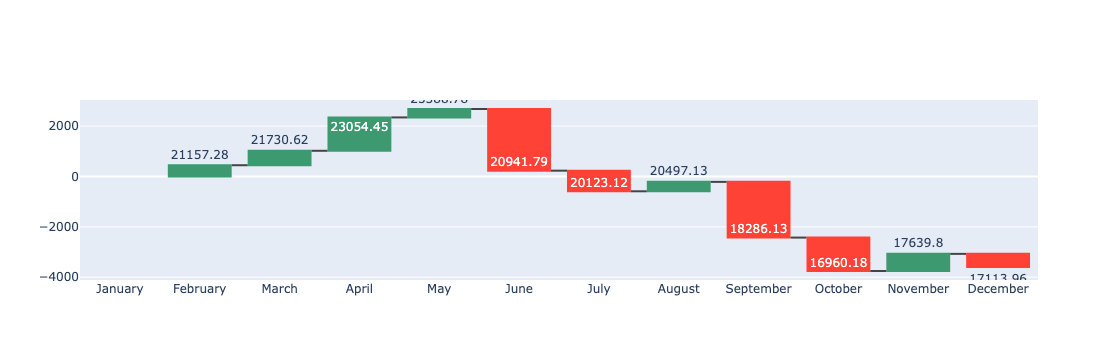

In [125]:
x=waterfall['month']
y=waterfall['rev_growth']
measure = waterfall['rev_growth']
text=waterfall['revenue']

fig = go.Figure(go.Waterfall(
    measure=measure,
    x=x,
    y=y,
    text=text

))

fig.show()

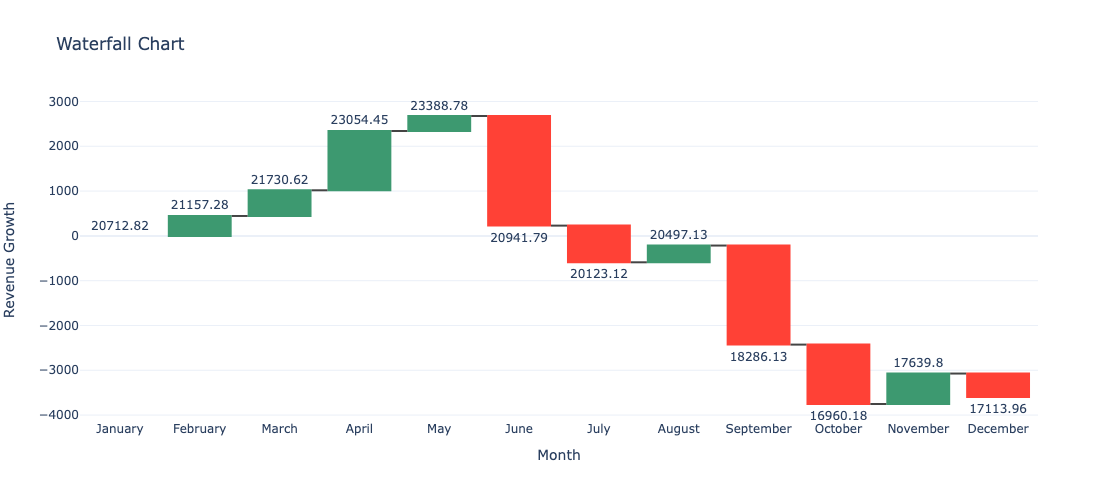

In [121]:
import plotly.graph_objects as go

x = waterfall['month']
y = waterfall['rev_growth']
measure = waterfall['revenue']
text = waterfall['revenue']

fig = go.Figure(go.Waterfall(
    measure=measure,
    x=x,
    y=y,
    text=text,
    # textangle=0,
    textposition='outside'
))

fig.update_layout(
    title="Waterfall Chart",
    xaxis_title="Month",
    yaxis_title="Revenue Growth",
    template="plotly_white",
    width=900,
    height=500
)

fig.show()


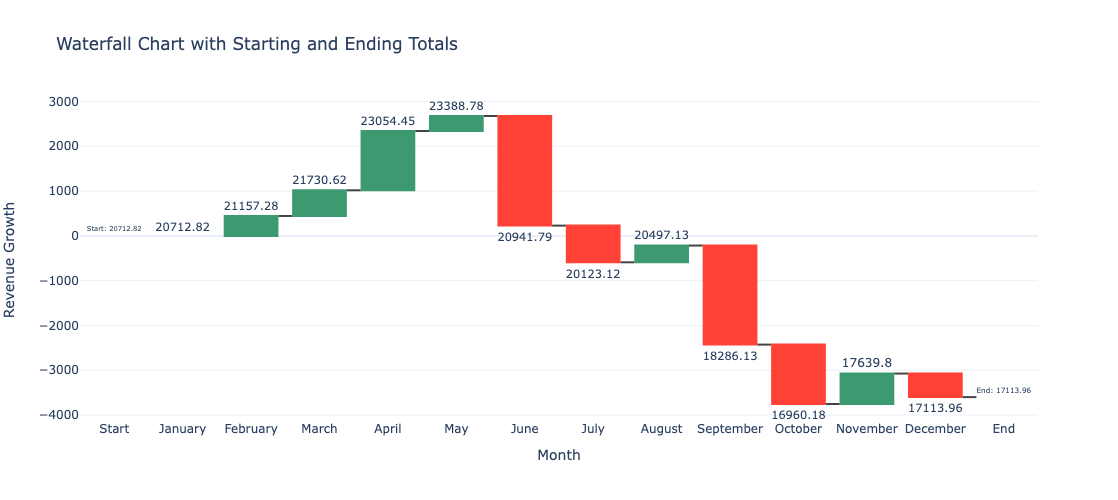

In [124]:
import plotly.graph_objects as go

x = waterfall['month']
y = waterfall['rev_growth']
measure = waterfall['revenue']
text = waterfall['revenue']

# Calculate the starting and ending totals
starting_total = measure.iloc[0]
ending_total = measure.iloc[-1]

# Add the starting and ending totals as data points
x = ["Start"] + x.tolist() + ["End"]
y = [0] + y.tolist() + [0]
measure = [starting_total] + measure.tolist() + [ending_total]
text = ["Start: {:.2f}".format(starting_total)] + text.tolist() + ["End: {:.2f}".format(ending_total)]

fig = go.Figure(go.Waterfall(
    measure=measure,
    x=x,
    y=y,
    text=text,
    textposition='outside'
))

fig.update_layout(
    title="Waterfall Chart with Starting and Ending Totals",
    xaxis_title="Month",
    yaxis_title="Revenue Growth",
    template="plotly_white",
    width=900,
    height=500
)

fig.show()


## Creating Funnel Charts

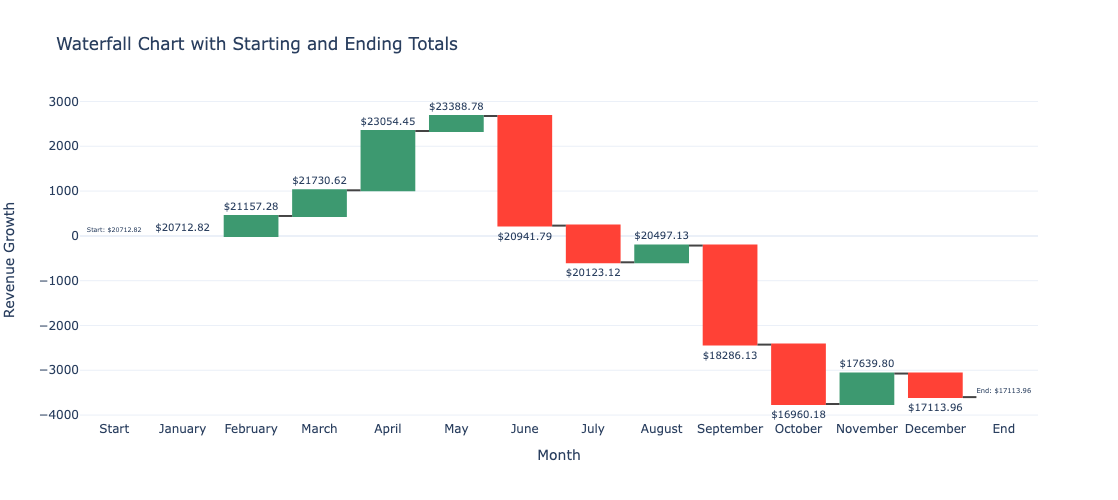

In [127]:
import plotly.graph_objects as go

x = waterfall['month']
y = waterfall['rev_growth']
measure = waterfall['revenue']

# Calculate the starting and ending totals
starting_total = measure.iloc[0]
ending_total = measure.iloc[-1]

# Add the starting and ending totals as data points
x = ["Start"] + x.tolist() + ["End"]
y = [0] + y.tolist() + [0]
measure = [starting_total] + measure.tolist() + [ending_total]

# Format the text with currency symbol and two decimal places
text = ["Start: ${:.2f}".format(starting_total)] + ["${:.2f}".format(val) for val in measure[1:-1]] + ["End: ${:.2f}".format(ending_total)]

fig = go.Figure(go.Waterfall(
    measure=measure,
    x=x,
    y=y,
    text=text,
    textposition='outside'
))

fig.update_layout(
    title="Waterfall Chart with Starting and Ending Totals",
    xaxis_title="Month",
    yaxis_title="Revenue Growth",
    template="plotly_white",
    width=900,
    height=500
)

fig.show()
